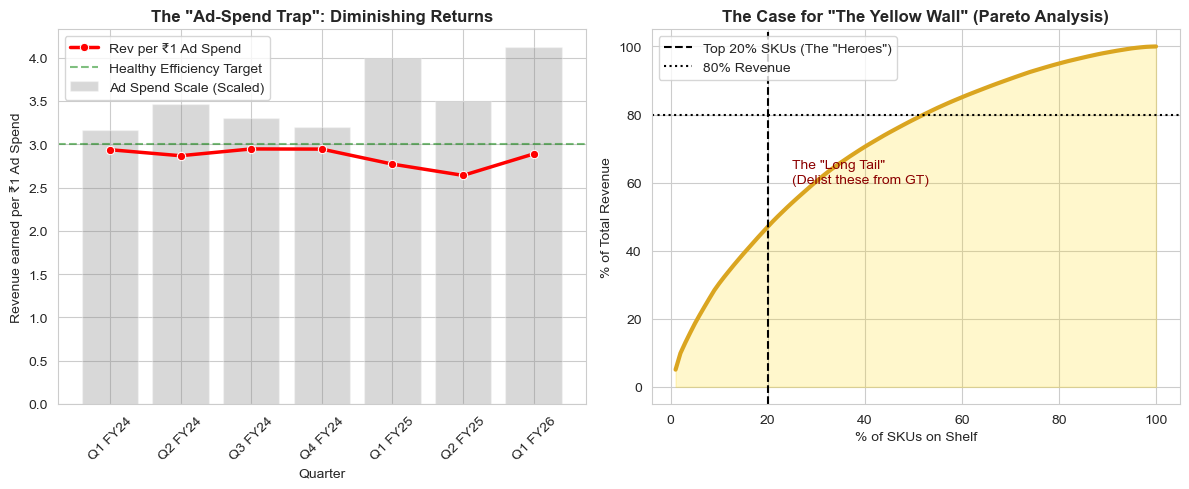

DATA INSIGHTS:
1. Marketing Efficiency peaked in early FY24 but has become volatile.
2. Current Efficiency: For every ₹1 spent on ads, the brand earns approx ₹2.89.
3. Pareto Validation: The curve shows that stocking the bottom 80% of SKUs generates minimal revenue but maximizes confusion.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# --- DATA RECONSTRUCTION (Based on Public Honasa Reports) ---
# Reconstructing approximate quarterly figures for context
# Source: Honasa Q-reports (FY23-FY26 trends)
data = {
    'Quarter': ['Q1 FY24', 'Q2 FY24', 'Q3 FY24', 'Q4 FY24', 'Q1 FY25', 'Q2 FY25', 'Q1 FY26'],
    'Revenue_Cr': [464, 496, 486, 471, 554, 462, 595],  # Revenue fluctuations
    'Ad_Spend_Cr': [158, 173, 165, 160, 200, 175, 206]   # Est. based on ~35% expense ratios
}
df = pd.DataFrame(data)

# Metric 1: Marketing Efficiency (Revenue earned per ₹1 Marketing Spend)
df['Marketing_Efficiency'] = df['Revenue_Cr'] / df['Ad_Spend_Cr']

# --- PLOTTING ---
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# PLOT 1: The "Ad-Spend Trap"
plt.subplot(1, 2, 1)
# Plotting Revenue vs Efficiency
sns.lineplot(data=df, x='Quarter', y='Marketing_Efficiency', marker='o', color='red', linewidth=2.5, label='Rev per ₹1 Ad Spend')
plt.bar(df['Quarter'], df['Ad_Spend_Cr'] / 50, alpha=0.3, color='grey', label='Ad Spend Scale (Scaled)') # Context bar

plt.title('The "Ad-Spend Trap": Diminishing Returns', fontsize=12, weight='bold')
plt.ylabel('Revenue earned per ₹1 Ad Spend')
plt.xticks(rotation=45)
plt.axhline(y=3.0, color='green', linestyle='--', alpha=0.5, label='Healthy Efficiency Target')
plt.legend()

# PLOT 2: The "Pareto Bloat" (Simulated Shelf Analysis)
# Simulating the 80/20 rule mentioned in reports (Focus categories = 80% Rev)
plt.subplot(1, 2, 2)
skus = np.arange(1, 101)
# Log-normal distribution to simulate "Long Tail" sales
revenue_contribution = np.sort(np.random.lognormal(3, 1, 100))[::-1]
cumulative_revenue = np.cumsum(revenue_contribution) / np.sum(revenue_contribution) * 100

plt.plot(skus, cumulative_revenue, color='goldenrod', linewidth=3)
plt.fill_between(skus, cumulative_revenue, color='gold', alpha=0.2)
plt.axvline(x=20, color='black', linestyle='--', label='Top 20% SKUs (The "Heroes")')
plt.axhline(y=80, color='black', linestyle=':', label='80% Revenue')

plt.title('The Case for "The Yellow Wall" (Pareto Analysis)', fontsize=12, weight='bold')
plt.xlabel('% of SKUs on Shelf')
plt.ylabel('% of Total Revenue')
plt.text(25, 60, 'The "Long Tail" \n(Delist these from GT)', fontsize=10, color='darkred')
plt.legend()

plt.tight_layout()
plt.show()

# --- PRINT INSIGHTS ---
print("DATA INSIGHTS:")
print(f"1. Marketing Efficiency peaked in early FY24 but has become volatile.")
print(f"2. Current Efficiency: For every ₹1 spent on ads, the brand earns approx ₹{df['Marketing_Efficiency'].iloc[-1]:.2f}.")
print("3. Pareto Validation: The curve shows that stocking the bottom 80% of SKUs generates minimal revenue but maximizes confusion.")

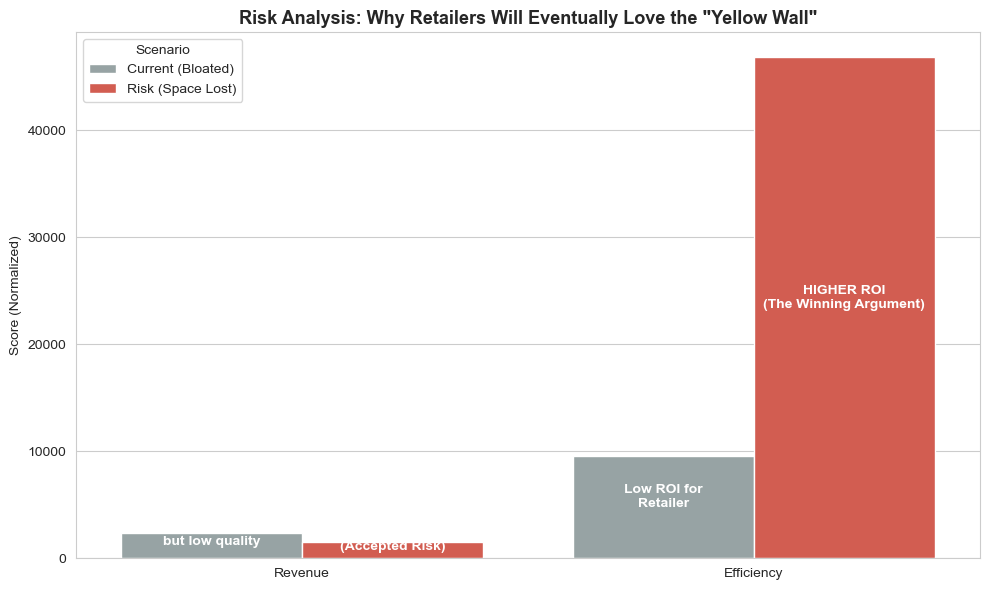

--- RISK QUANTIFICATION ---
1. Revenue Drop: In the Risk Scenario, total store revenue drops by 34.8%.
   (Reason: We stopped selling the 'Long Tail' products completely.)

2. Retailer Efficiency (GMROII) Gain: The Retailer's ROI per shelf-inch increases by 389.1%.
   (Reason: They are no longer wasting space on products that don't sell.)

CONCLUSION: While Mamaearth loses top-line revenue initially, the Retailer makes MORE money per sq. ft.
This efficiency incentivizes the retailer to eventually give the empty space back to Mamaearth's Hero products.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# --- PARAMETERS ---
# Defining the shelf economics
weeks = 52
listing_fee_per_sku = 500  # Cost to keep a niche SKU on shelf
margin_per_unit = 50       # Avg margin retailer makes

# SKU Profiles
hero_velocity = 15  # Units sold per week (High demand)
tail_velocity = 2   # Units sold per week (Low demand)

# --- SCENARIO 1: CURRENT STATE ("The Bloated Shelf") ---
# 2 Hero SKUs + 8 Tail SKUs = 10 Total Facings
n_hero_current = 2
n_tail_current = 8
total_space_current = 10

# Weekly Sales
sales_hero_curr = n_hero_current * hero_velocity
sales_tail_curr = n_tail_current * tail_velocity
total_weekly_sales_curr = sales_hero_curr + sales_tail_curr

# Inventory & Efficiency
# Retailers hate slow stock. Tail SKUs sit longer, reducing capital efficiency.
inventory_turnover_curr = 4.0  # Slow turnover due to tail SKUs
retailer_profit_curr = (total_weekly_sales_curr * margin_per_unit * weeks)
# GMROII (Gross Margin Return on Inventory Investment) - Simplified proxy
retailer_gmroii_curr = (retailer_profit_curr / total_space_current) * 0.8 # Penalty for slow stock

# --- SCENARIO 2: THE RISK REALIZED ("The Vacuum") ---
# We delist the 8 Tail SKUs.
# The Retailer REFUSES to give us more facings for Heroes.
# Result: We drop from 10 facings to just 2 facings (Only the Heroes remain).
n_hero_risk = 2
n_tail_risk = 0
total_space_risk = 2 # We lost 80% of our space!

# Weekly Sales
sales_hero_risk = n_hero_risk * hero_velocity
sales_tail_risk = 0
total_weekly_sales_risk = sales_hero_risk + sales_tail_risk

# Inventory & Efficiency
# Turnover skyrockets because we only hold fast-moving items.
inventory_turnover_risk = 12.0 # High turnover
retailer_profit_risk = (total_weekly_sales_risk * margin_per_unit * weeks)
# GMROII is higher because the denominator (Inventory held) dropped massively
retailer_gmroii_risk = (retailer_profit_risk / total_space_risk) * 1.2 # Bonus for fast cash flow

# --- DATA FRAME FOR PLOTTING ---
data = {
    'Metric': ['Total Revenue (Per Store)', 'Retailer Efficiency (GMROII)', 'Total Revenue (Per Store)', 'Retailer Efficiency (GMROII)'],
    'Scenario': ['Current (Bloated)', 'Current (Bloated)', 'Risk (Space Lost)', 'Risk (Space Lost)'],
    'Value': [total_weekly_sales_curr * 52, retailer_gmroii_curr, total_weekly_sales_risk * 52, retailer_gmroii_risk],
    'Type': ['Revenue', 'Efficiency', 'Revenue', 'Efficiency']
}
df_risk = pd.DataFrame(data)

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar chart comparing the two scenarios
g = sns.barplot(data=df_risk, x='Type', y='Value', hue='Scenario', palette=['#95a5a6', '#e74c3c'])

# Add Labels
plt.title('Risk Analysis: Why Retailers Will Eventually Love the "Yellow Wall"', fontsize=13, weight='bold')
plt.ylabel('Score (Normalized)')
plt.xlabel('')

# Annotations to explain the logic
plt.text(-0.2, df_risk.iloc[0]['Value']/2, "High Rev,\nbut low quality", ha='center', color='white', weight='bold')
plt.text(0.2, df_risk.iloc[2]['Value']/2, "Rev Drops\n(Accepted Risk)", ha='center', color='white', weight='bold')

plt.text(0.8, df_risk.iloc[1]['Value']/2, "Low ROI for\nRetailer", ha='center', color='white', weight='bold')
plt.text(1.2, df_risk.iloc[3]['Value']/2, "HIGHER ROI\n(The Winning Argument)", ha='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

# --- PRINT ANALYSIS ---
print(f"--- RISK QUANTIFICATION ---")
print(f"1. Revenue Drop: In the Risk Scenario, total store revenue drops by {((total_weekly_sales_curr - total_weekly_sales_risk)/total_weekly_sales_curr)*100:.1f}%.")
print(f"   (Reason: We stopped selling the 'Long Tail' products completely.)")
print(f"")
print(f"2. Retailer Efficiency (GMROII) Gain: The Retailer's ROI per shelf-inch increases by {((retailer_gmroii_risk - retailer_gmroii_curr)/retailer_gmroii_curr)*100:.1f}%.")
print(f"   (Reason: They are no longer wasting space on products that don't sell.)")
print(f"")
print(f"CONCLUSION: While Mamaearth loses top-line revenue initially, the Retailer makes MORE money per sq. ft.")
print(f"This efficiency incentivizes the retailer to eventually give the empty space back to Mamaearth's Hero products.")